In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import Libraries
import os
import gc
import shutil
import cv2
import numpy as np
import pandas as pd
from tqdm import tqdm
tqdm.pandas()
import warnings
warnings.filterwarnings("ignore")

import xml.etree.ElementTree as xet

In [3]:
!git clone https://github.com/ultralytics/ultralytics


!pip install ultralytics
!pip install -U ray[tune]

Cloning into 'ultralytics'...
remote: Enumerating objects: 45161, done.
remote: Counting objects: 100% (827/827), done.
remote: Compressing objects: 100% (542/542), done.
remote: Total 45161 (delta 536), reused 466 (delta 285), pack-reused 44334 (from 1)
Receiving objects: 100% (45161/45161), 38.62 MiB | 11.12 MiB/s, done.
Resolving deltas: 100% (33476/33476), done.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 896.9/896.9 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.3/66.3 MB 12.1 MB/s eta 0:00:00


In [30]:
from ultralytics import YOLO

path = "/content/drive/MyDrive/Colab Notebooks/dataset/images/train/BR10.jpg"

yolo_model = YOLO('/content/new_best.pt')
bbox_results = yolo_model.predict(path, verbose=False)

In [31]:
all_box_list = []
all_conf_list = []


for bbox_result in bbox_results:
    boxes = bbox_result.boxes
    box_list = []
    conf_list = []
    for box in boxes:
        box_data = box.data[0][:4]
        box_data = [int(x) for x in box_data]
        conf = round(float(box.conf), 2)
        if(conf>=0.5):
            box_list.append(box_data)
            conf_list.append(conf)

    all_box_list.append(box_list)
    all_conf_list.append(conf_list)

In [32]:
all_conf_list

[[0.8]]

In [33]:
print(all_box_list[0])
print(all_conf_list)

[[108, 232, 193, 258]]
[[0.8]]


In [34]:
ori_path = path
print(ori_path)
ori_image = cv2.imread(ori_path)
ori_image = cv2.cvtColor(ori_image, cv2.COLOR_BGR2RGB)

/content/drive/MyDrive/Colab Notebooks/dataset/images/train/BR10.jpg


In [35]:
from ultralytics.utils.plotting import Annotator


annotator = Annotator(ori_image)
boxes = all_box_list
confs = all_conf_list

In [36]:
for i in all_box_list[0]:
  print(i)

[108, 232, 193, 258]


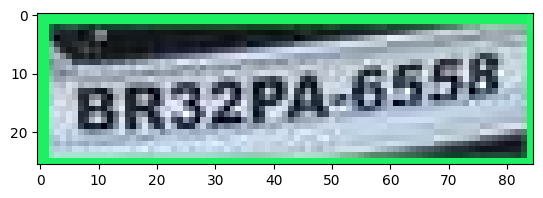

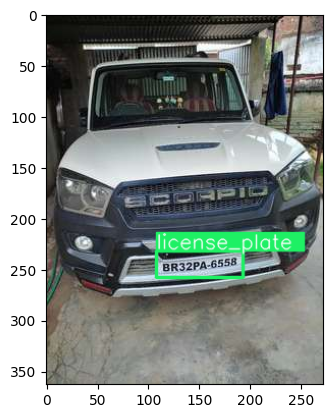

In [37]:
import matplotlib.pyplot as plt

# for i, box in enumerate(boxes):
#   print(i)
box = all_box_list[0][0]
confs = 0.120
annotator.box_label(box=box, label="license_plate ", color=(30, 240, 100))

# Get Plate Object
x1, y1, x2, y2 = box
x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
roi = ori_image[y1:y2, x1:x2]
plt.imshow(roi)
plt.show()

# Show Image
frame = annotator.result()
plt.imshow(frame)
plt.show()